In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

### 1. Consider a grain of pollen suspended in water, whose horizontal position can be modeled by Brownian motion $\{ B(t)\}$ with parameter $\alpha = 4 \text{mm}^2/\text{s}$, as in Example 49.1. Calculate the autocovariance function of $\{ B(s,t) \}$. Check that this autocovariance function agrees with the variance function you derived in Lesson 51.

- By Brownian motion definition, 
    - $B(t) - B(0) \sim \text{Normal}(\mu=0, \sigma=\sqrt{4 \cdot [t_1 - t_0]} ) $
    - $V(t) = Var[B(t)] = 4 \cdot (t_1 - t_0)$ 

- Assume $0 \lt s \lt t \lt \inf$

- We will follow Example 52.2, and rewrite $t$ in terms of $s$ to get 2 independent time periods. This lets us use the fact that Brownian motion is independent between time periods
    - $\{B(s)\} = B(s) - B(0)$
    - $\{B(t)\} = B(s) + B(t-s)$

$$\begin{align}
    C_{B}(s,t) &= Cov[B(s), B(s) + B(t-s)] \\
    &= Cov[B(s), B(s)] + Cov[B(s) + B(t-s)] \\
    &= Cov[B(s), B(s)] & \text{by independence } Cov[B(s) + B(t-s)] = 0 \\ 
    &= Var[B(s)] \\
    &= V(s) \\
    &= 4 \cdot (s - 0)
\end{align}$$

- In general, $C_{B}(s,t) = V(min(s,t)) = 4 \cdot (min(s,t) - 0)$

- When $s=t$, then $V(t) = 4 \cdot (t-0)$, which matches the variance result we got in section 51 Q1

In [55]:
# STEPS = 100
# instantiations = np.array([np.random.normal(0,1,size=STEPS).cumsum() for _ in range(500)])
# s = 20
# t = 50
# for smaller_val in range(30):
#     step_s= [i[smaller_val] for i in instantiations]
#     step_t = [i[t] for i in instantiations]
#     print(np.cov(step_s, step_t)[0,1])

### 2. Radioactive particles hit a Geiger counter according to a Poisson process at a rate of $\lambda = 0.8$ particles per second. Let $\{ N(t); t \ge 0 \}$ represent this Poisson process. Define the new process $\{ D(t); t \ge 3 \}$ by $$D(t) = N(t) - N(t-3)$$ This process represents the number of particles that hit the Geiger counter in the last 3 seconds. Calculate the autocovariance function of $\{ D(t); t \ge 3 \}$. Check that this autocovariance function agrees with the variance function you derived in Lesson 51.

### (Hint: Start by calculating $Cov[D(s), D(t)]$ when $s \gt t$. What happens when $s \gt t + 3$? What happens when $t \lt s \lt t+3$? Once you’ve worked this out, it should be straightforward to extend this to the case $s \lt t$.)

- For this poisson process, the arrivals for any time interval $t$ is distributed according to $\text{Poisson}(\lambda = 0.8)$ distribution
- Since non-overlapping time periods are independent in a Poisson process, the count of particles that hit the Geiger counter in the last 3 seconds $D(t) = N(t) - N(t-3)$ follows the same distribution across any 3 second period
    - $D(t) \sim \text{Poisson}(\lambda = 0.8 * 3 = 2.4)$

$$\begin{align}
    C_{D}(s,t) &= Cov[D(s), D(t)] \\
    &= Cov[D(s), D(s + (t-s))] \\
    &= Cov[D(s), D(s)] + Cov[D(s), D(t-s)] \\
    &= Var[D(s)] & \text{by Poisson independence } Cov[D(s), D(t-s)] = 0 \\
    &= \lambda \cdot s
\end{align}$$

- In general, $C_{D}(s,t) = \lambda \cdot \text{min}(s,t)$

- When $s=t$, $C_{D}(s,t) = Var[D(t)] = \lambda \cdot t$, which matches our answer in Section 51 Q2

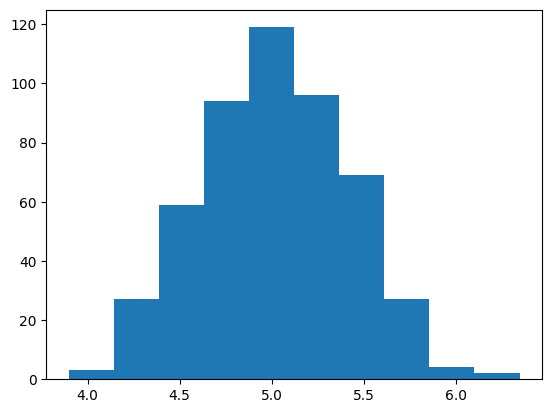

In [132]:
LAM = 1
s = 5
t = 25
covs = []


for i in range(500):
    instantiations = np.array([np.random.poisson(LAM, size=30).cumsum() for _ in range(1000)])
    lower = np.array([i[s-1] for i in instantiations]) ##-1 because of 0 indexing; when s=5, without the -1, we look at the 6th time step
    higher = np.array([i[t-1] for i in instantiations])
    covs.append(np.cov(lower, higher)[0,1])

plt.hist(covs, bins=10);
# covs

### 3. Consider the moving average process $\{ X[n]\}$ of example 48.2, defined by $$X[n] = 0.5 Z[n] + 0.5 Z[n-1]$$ where $\{ Z[n]\}$ is a sequence of i.i.d. standard normal random variables. Calculate the autocovariance function of $\{ X[n] \}$.  Check that this autocovariance function agrees with the variance function you derived in Lesson 51.

### (Hint: Consider the following cases: (1) m = n, (2) m = n+1, (3) m = n-1, (4) m > n+1, (5) m < n-1)

- Let's consider all distinct cases: 

- If m=n
    - $$\begin{align}
        C_{X}(m,n) &= Cov[X[m], X[n]] \\
        &= Cov[X[m], X[n]] \\
        &= Cov[X[m], X[m]] \\
        &= Var[X[m]] \\
        &= Var[0.5 Z[n] + 0.5Z[n-1]] \\
        &= 0.25 Var[Z[n] + Z[n-1]] \\
        &= 0.25 * (Var[Z[n]] + Var[Z[n-1]]) \\
        &= 0.25 * (2) \\
        &= 0.5
        \end{align}$$

- If m=n+1
    - $$\begin{align}
        C_{X}(m,n) &= Cov[X[m], X[n]] \\
        &= Cov[X[n+1], X[n]] \\
        &= Cov[0.5 Z[n+1] + 0.5 Z[n], 0.5 Z[n] + 0.5 Z[n-1]] \\
        &= 0.25 Cov[Z[n+1] + Z[n], Z[n] + Z[n-1]] \\
        &= 0.25 (Cov[Z[n+1],Z[n]] + Cov[Z[n], Z[n]] + Cov[Z[n+1], Z[n]] + Cov[Z[n+1], Z[n-1]]) \\
        &= 0.25 (Cov[Z[n], Z[n]]) \\
        &= 0.25 Var[Z[n] \\
        &= 0.25
        \end{align}$$

- If m=n-1
    - Same logic as m=n+1
    - $$\begin{align}
        C_{X}(m,n) &= Cov[X[m], X[n]] \\
        &= Cov[X[n-1], X[n]] \\
        &= 0.25 Var[Z[n-1] \\
        &= 0.25
        \end{align}$$

- If m>n+1
    - Same logic as m < n-1
    - $$\begin{align}
        C_{X}(m,n) &= Cov[X[m], X[n]] \\
        &= Cov[X[n+c], X[n]] & c > 1 \\
        &= Cov[0.5 Z[n+c] + 0.5 Z[n+c-1], 0.5 Z[n] + 0.5 Z[n-1]] \\
        &= 0.25 Cov[Z[n+c] + Z[n+c-1], Z[n] + Z[n-1]] \\
        &= 0.25 \cdot 0 \\
        &= 0
        \end{align}$$

$$\begin{align}
    V(t) &= Var[X[n]] \\
    &= Var[0.5 Z[n] + 0.5 Z[n-1]] \\
    &= Var[0.5 Z[n]] + Var[0.5 Z[n-1]] \\
    &= 0.25 Var[Z[n]] + 0.25 Var[Z[n-1]] \\
    &= 2 * (0.25 \cdot 1 ) \\
    &= 0.5
\end{align}$$

In [196]:
zvals = [np.random.normal(0,1,size=100) for _ in range(500)]
w = np.repeat(0.5,2)

instantiations = np.array([np.convolve(z, w, 'same') for z in zvals])

m = 10
n = 11

lower = np.array([i[m] for i in instantiations])
upper = np.array([i[n] for i in instantiations])
np.cov(lower, upper)[0,1]

0.2537431731326134

### 4. Let $\Theta$ be a $\text{Uniform}(a= -\pi, b = \pi)$ random variables, and let $f$ be a constant. Define the random phase process $\{ X(t) \}$ by $$ X(t) = \cos(2 \pi f t + \Theta) $$ Calculate the autocovariance function of $\{ X(t) \}$. Check that this agrees with the variance function you derived in Section 51 Q4 (Hint: Use the shortcut formula for covariance, calculate E[X(s)X(t)] by LOTUS)

$$\begin{align}
    Cov[X(s), X(t)] &= Cov[\cos(2 \pi ft + \Theta), \cos(2 \pi f s + \Theta)] \\
    &= E[\cos(2 \pi ft + \Theta) \cdot \cos(2 \pi f s + \Theta)] - E[\cos(2 \pi ft + \Theta)]E[\cos(2 \pi f s + \Theta)] \\
    &= E[\cos(2 \pi ft + \Theta) \cdot \cos(2 \pi f s + \Theta)] & \text{From exercise 50 Q4 } E[\cos(2 \pi ft + \Theta)] = 0 \\
    &= \int_{-\pi}^{\pi} \cos(2 \pi ft + \Theta) \cdot \cos(2 \pi f s + \Theta) f(\Theta) \text{ } d \Theta \\
    &= \int_{-\pi}^{\pi} \cos(2 \pi ft + \Theta) \cdot \cos(2 \pi f s + \Theta) \frac{1}{2\pi} \text{ } d \Theta \\
    &= \frac{1}{2\pi} \cdot \int_{-\pi}^{\pi} \cos(2 \pi ft + \Theta) \cdot \cos(2 \pi f s + \Theta) \text{ } d \Theta \\
    &= \frac{1}{2\pi} \cdot \int_{-\pi}^{\pi} \frac{1}{2} [\cos(2 \pi ft + \Theta + 2 \pi fs + \Theta) + \cos(2 \pi ft + \Theta - 2 \pi fs - \Theta)] \text{ } d \Theta \\
    &= \frac{1}{4\pi} \cdot \int_{-\pi}^{\pi} [\cos(2 \pi ft + 2 \pi fs + 2 \Theta) + \cos(2 \pi ft - 2 \pi fs)] \text{ } d \Theta \\
    &= \frac{1}{4\pi} \cdot \int_{-\pi}^{\pi} \cos(2 \pi ft + 2 \pi fs + 2 \Theta) \text{ } d \Theta + \int_{-\pi}^{\pi} \cos(2 \pi ft - 2 \pi fs) \text{ } d \Theta \\
    &= \frac{1}{4\pi} [\frac{1}{2} [\sin(2 \pi ft + 2 \pi fs + 2 \Theta)]^{\pi}_{-\pi} + [\cos(2 \pi ft - 2 \pi fs) \Theta]^{\pi}_{-\pi}] \\
    &= \frac{1}{4\pi} [[\cos(2 \pi ft - 2 \pi fs) \Theta]^{\pi}_{-\pi}] & \text{because } \sin(a+2\pi) = \sin(a - 2\pi) \\
    &= \frac{\cos(2 \pi ft - 2 \pi fs)}{4\pi} [2\pi] \\
    &= \frac{\cos(2 \pi ft - 2 \pi fs)}{2} \\
\end{align}$$

- When $s=t$, $Cov[X(s), X(t)] = \frac{\cos(0)}{2} = \frac{1}{2} = Var[X(s)]$